<a href="https://www.kaggle.com/code/mrsimple07/laptop-price-analysis-prediction?scriptVersionId=171734803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-explorer-the-ml-model/laptops.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/laptop-price-explorer-the-ml-model/laptops.csv')

df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


**Data exploration**

In [3]:
df.shape

(1000, 11)

In [4]:
df.describe

<bound method NDFrame.describe of     CompanyName        TypeOfLaptop     Inches  \
0           MSI     Business Laptop  17.040680   
1         Chuwi  2 in 1 Convertible  16.542395   
2            hp         WorkStation  17.295294   
3           MSI  2 in 1 Convertible  11.526203   
4     Microsoft              Gaming  12.649634   
..          ...                 ...        ...   
995          hp              Gaming  16.242566   
996   Microsoft         WorkStation  17.450809   
997      lenevo            NoteBook  13.761288   
998        Asus           UltraBook  11.038000   
999        Dell            NoteBook  11.005842   

                       ScreenResolution                             Cpu   Ram  \
0    IPS Panel Retina Display 2560x1600                   Intel Core i7  12GB   
1                               Full HD                   Intel Core i5  12GB   
2                               Full HD            Intel Xeon E3-1505M    8GB   
3                                    2K  

In [5]:
df.isnull().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Data is clean. It makes even easier to work

We can convert the RAM column into numerical, because we want to work with it.

In [6]:
df['Ram']= df['Ram'].str.replace('GB', '').astype(int)
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


Let's build the correlation matrix to see the relation between inches, ram, weight and price.

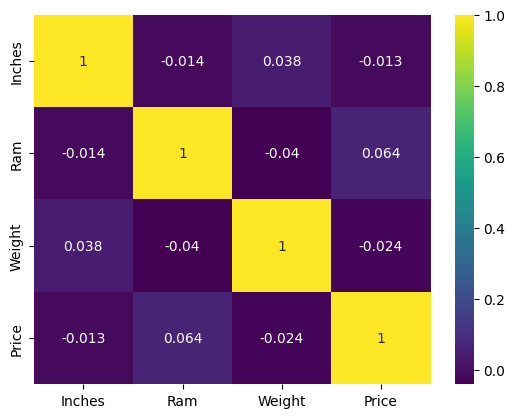

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = ['Inches', 'Ram', 'Weight', 'Price']

sns.heatmap(df[corr_matrix].corr(), cmap ='viridis', annot = True)
plt.show()

And now we look at the Company Name Distribution in our Data

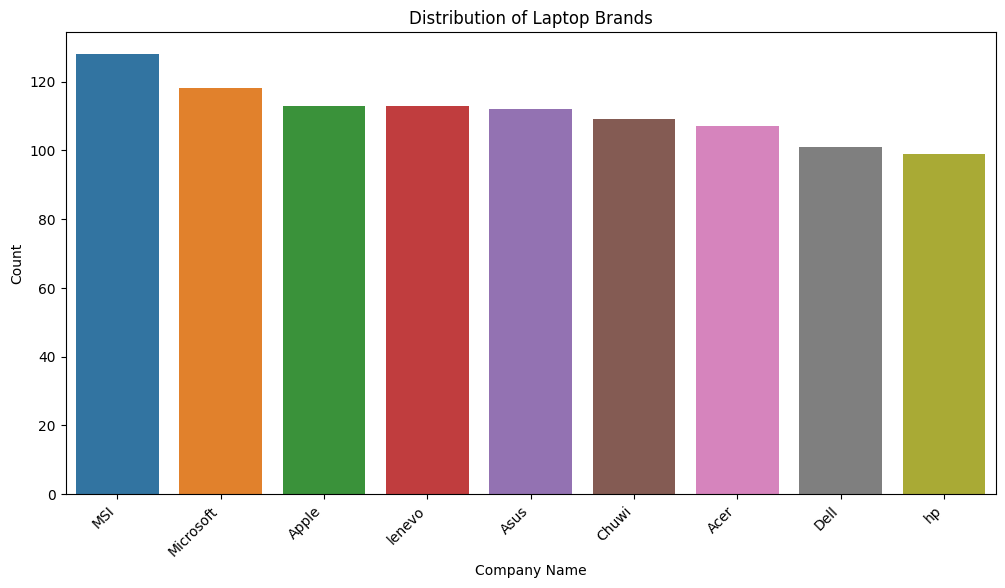

In [8]:
import matplotlib.pyplot as plt

company_counts = df['CompanyName'].value_counts()

plt.figure(figsize =(12,6))
sns.barplot(x= company_counts.index, y = company_counts.values)
plt.title('Distribution of Laptop Brands')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

Type of Laptops Distribution

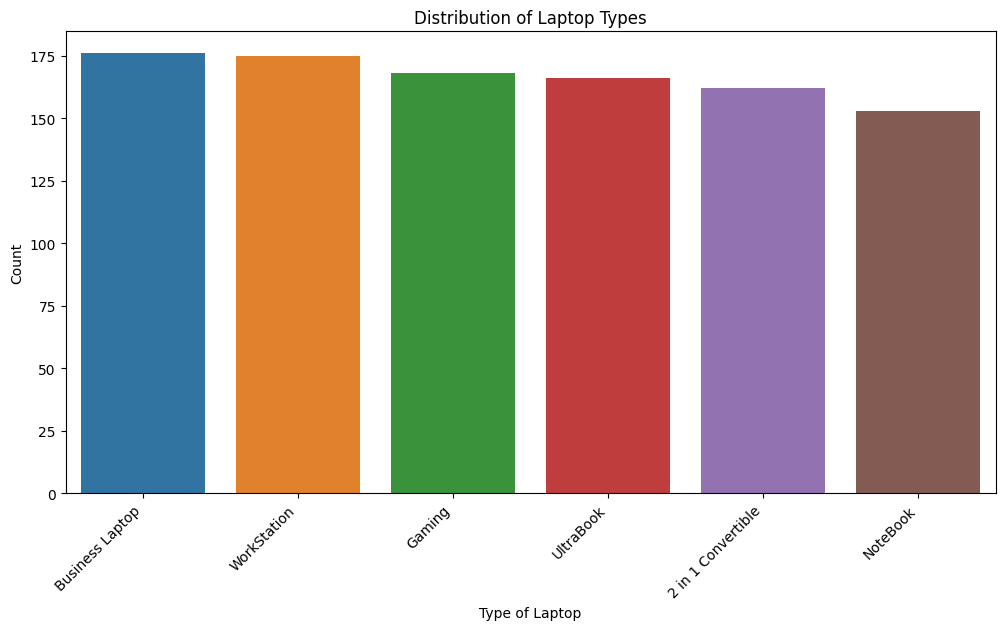

In [9]:
laptop_types = df['TypeOfLaptop'].value_counts()

plt.figure(figsize= (12,6))
sns.barplot(x= laptop_types.index, y =laptop_types.values)
plt.title('Distribution of Laptop Types')
plt.xlabel('Type of Laptop')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

OpSys Distribution:

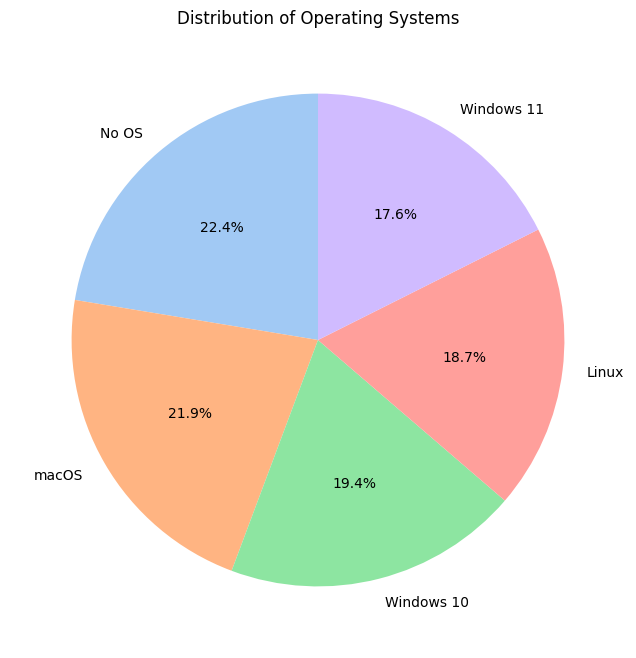

In [10]:
os_counts = df['OpSys'].value_counts()

# Plot the distribution of OpSys
plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Operating Systems')
plt.show()

Price Range by Type of Laptop:

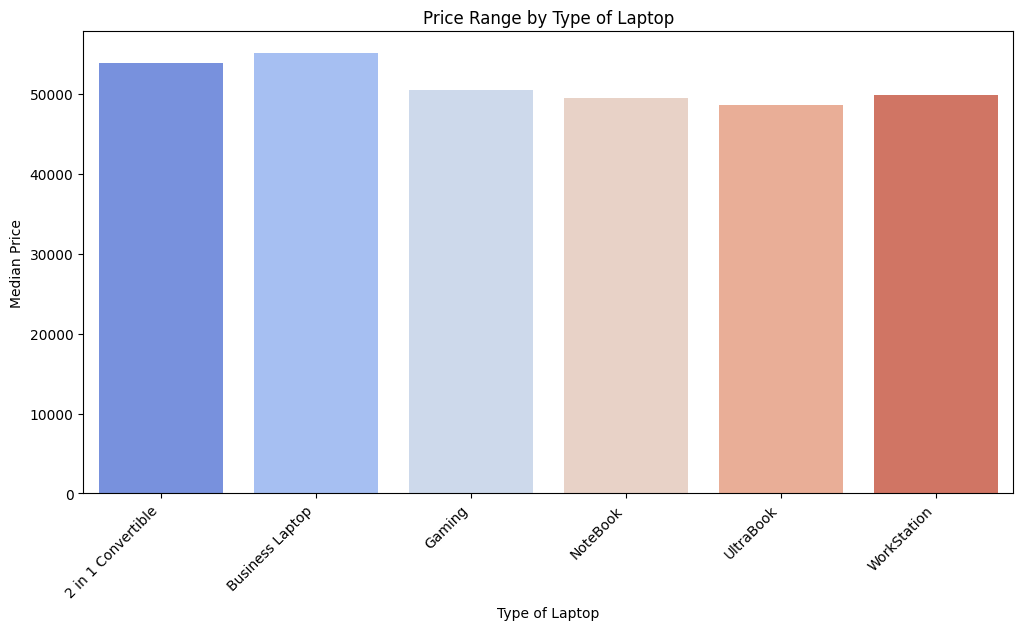

In [11]:
price_by_type = df.groupby('TypeOfLaptop')['Price'].agg(['mean', 'median'])

plt.figure(figsize=(12, 6))
sns.barplot(x=price_by_type.index, y=price_by_type['median'], palette='coolwarm')
plt.title('Price Range by Type of Laptop')
plt.xlabel('Type of Laptop')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.show()

GPU analysis:

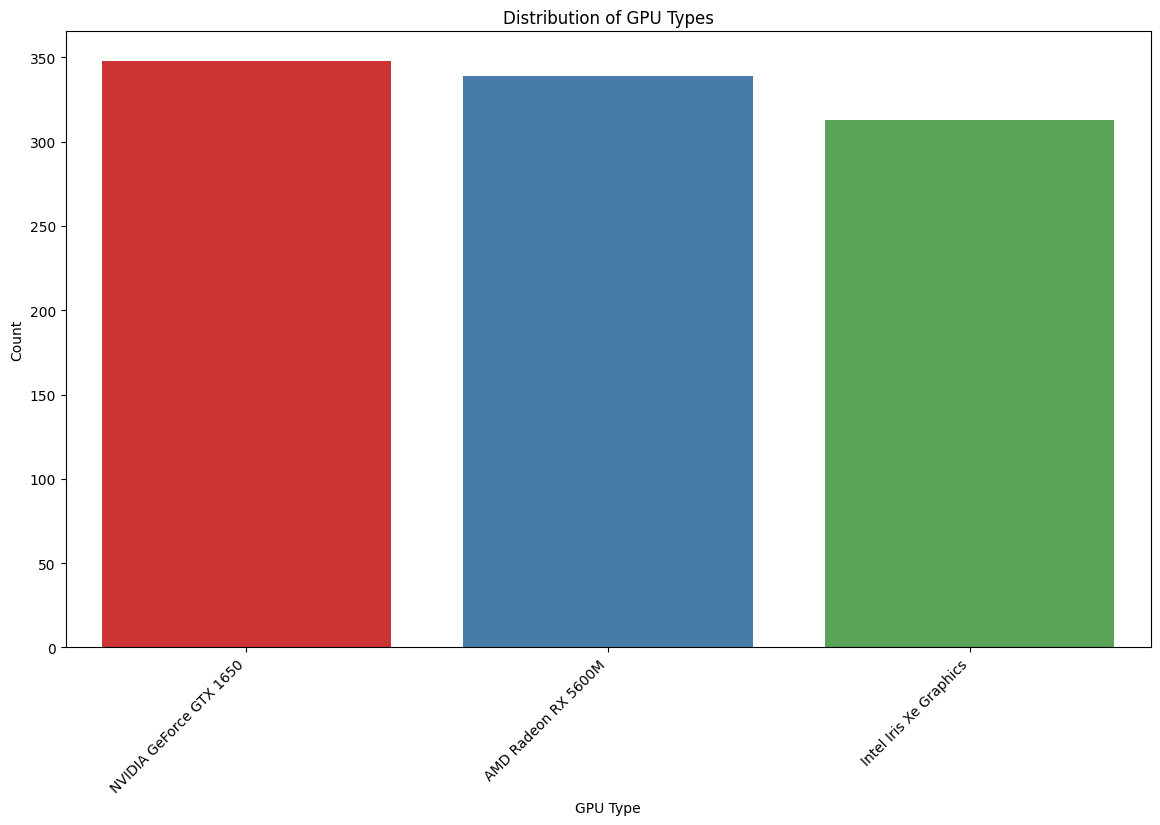

In [12]:
# Create a count plot to visualize GPU distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='Gpu', data=df, palette='Set1', order=df['Gpu'].value_counts().index)
plt.title('Distribution of GPU Types')
plt.xlabel('GPU Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


As we can see, NVIDIA GeForCe GTX 1650, AMD Radeon RX 5600M, Intel IrisXe Graphics are the most popular GPU.

We analyzed the data and build some visualizations. And now let's build a model to predict the price. First we have to convert the categorical into numerical using pandas.

In [13]:
df = pd.get_dummies(df)

Now, it is time to build our model! We can use linear regression to predict

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(['Price'], axis =1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

215042213.8322812
